<a href="https://colab.research.google.com/github/JihyeLimm/Research/blob/main/noname/essay2_cand_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount = True)
os.chdir("/gdrive/MyDrive/exercise/230905")
os.getcwd()

Mounted at /gdrive


'/gdrive/MyDrive/exercise/230905'

#analyze_dataframe

In [ ]:
def analyze_dataframe(df, item_col_name, user_col_name=None, feedback_col_name=None):
    # 총 데이터 개수
    print(f'총 데이터 raw 수: {len(df)}')

    # item 수가 많은지 user 수가 많은지
    num_items = df[item_col_name].nunique()
    print(f'고유 Item 개수: {num_items}')

    # user_col_name이 제공된 경우에만 고유 user 수를 출력
    if user_col_name:
        num_users = df[user_col_name].nunique()
        print(f'고유 user 수: {num_users}')

    # user feedback 컬럼명을 받으면, 해당 값의 분포와 long tail인지, scaling이 필요한지
    if feedback_col_name:
        feedback_data = df[feedback_col_name]
        plt.figure(figsize=(10, 4))
        sns.histplot(feedback_data, kde=True)
        plt.xlabel(feedback_col_name)
        plt.ylabel('빈도')
        plt.title(f'유저 피드백 변수 {feedback_col_name}의 분포')
        plt.show()

        # Feedback scaling suggestion
        if feedback_data.skew() > 1:
            print(f"해당 {feedback_col_name} 컬럼에 롱테일 분포가 있습니다. 예를 들어 로그 변환을 사용하여 확장하는 것이 좋습니다.")
    else:
        print('유저 피드백 변수는 없습니다.')

    # 정규화가 필요한 컬럼이 있는지(있다면 분포가 어떻게 되는지)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if df[col].std()>df[col].mean()*0.3:
          print(f"해당 연속형 변수 '{col}' 컬럼: (표준 편차값: {df[col].std()}, 평균: {df[col].mean()}) [●정규화 유의] std>평균*30% 이상 ")
        else:
          print(f"해당 연속형 변수 '{col}' 컬럼 : (표준 편차값: {df[col].std()}, 평균: {df[col].mean()})")
        # if df[col].std() > 1:
        #     print(f"해당 연속형 변수 '{col}' 컬럼은 표준 편차가 1보다 훨씬 크기 때문에 정규화가 필요할 수 있습니다 (표준 편차값: {df[col].std()})")
        # elif df[col].std() < 0.5:
        #     print(f"해당 연속형 변수 '{col}' 컬럼은 표준 편차가 0.5보다 작기 때문에 정규화가 필요할 수 있습니다 (표준 편차값: {df[col].std()})")

    # 컬럼들 중 범주형 변수와 연속형 변수의 개수와 각각의 비율
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_categorical = len(categorical_columns)
    num_continuous = len(numeric_columns)
    total_columns = num_categorical + num_continuous

    print(f"범주형 변수 개수: {num_categorical} ({num_categorical / total_columns:.2%})")
    print(f"연속형 변수 개수: {num_continuous} ({num_continuous / total_columns:.2%})")
    print(f"총 변수 개수: {total_columns}")

    # 시계열 데이터 컬럼이 있는지 유무
    datetime_columns = df.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()

    # 문자열 형태로 저장된 시계열 데이터를 찾는 부분 추가
    for col in df.select_dtypes(include=['object']).columns:
        try:
            pd.to_datetime(df[col], errors='raise')
            datetime_columns.append(col)
        except:
            pass  # 이 경우, 해당 컬럼은 시계열 데이터가 아님

    if not datetime_columns:
        print('시계열 데이터 없음')
    else:
        print(f'시계열 데이터 컬럼: {datetime_columns}')


    # 컬럼 중에 NaN 값이 있으면 해당 컬럼의 NaN 값 비율을 출력
    for col in df.columns:
        nan_ratio = df[col].isna().sum() / len(df)
        if nan_ratio > 0:
            print(f"'{col}' 컬럼의  NaN 값 비율: {nan_ratio:.2%}")

    # 범주형 변수의 값들과 값들의 비율을 dictionary 형태로 출력
    for col in categorical_columns:
        value_counts = df[col].value_counts(normalize=True, dropna=False)

        # Sorting by value in descending order and limiting to top 30
        sorted_value_counts = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)[:30]
        value_ratios = {value: f"{count * 100:.2f}%" for value, count in sorted_value_counts}
        print(f"범주형 변수 '{col}' 컬럼 값 비율 (상위 30개): {value_ratios}")


      # 롱테일 분포 확인 (user_col_name이 제공된 경우에만 실행)
    if feedback_col_name and user_col_name:
        # 사용자별 평점 횟수 확인
        user_rating_count = df[user_col_name].value_counts()
        plt.figure(figsize=(10, 4))
        user_rating_count.plot(kind='hist', bins=30)
        plt.xlabel('1유저당 매긴 평점 개수')
        plt.ylabel('해당 사용자 수')
        plt.title('1유저당 매긴 평점 개수 분포')
        plt.show()

        # 아이템별 평점 횟수 확인
        item_rating_count = df[item_col_name].value_counts()
        plt.figure(figsize=(10, 4))
        item_rating_count.plot(kind='hist', bins=30)
        plt.xlabel('1아이템당 받은 평점 개수')
        plt.ylabel('해당 아이템 수')
        plt.title('1아이템당 받은 평점 개수 분포')
        plt.show()

#데이터 전처리

In [ ]:
path = './data/'
base_df = pd.read_csv(os.path.join(path, 'author_paper_43213_230907.csv'), encoding='utf-8',error_bad_lines=False)

# NaN 값을 제거하기 위해 필요한 경우 아래 코드를 추가로 실행
base_df = base_df.dropna()

# 범주형 피처 리스트
categorical_features = ['author_type', 'source', 'keywords']

base_df['author_id'] = base_df['author_id'].astype(int)

# author_type, source 범주형으로 바꾸기
base_df['author_type'] = base_df['author_type'].astype(str)
base_df['source'] = base_df['source'].astype(str)

# 텍스트 전처리
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자 제거
    text = re.sub(r'\W', ' ', text)
    # 한 글자짜리 단어 제거
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # 여러 개의 공백을 하나로 줄임
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # 'b'로 시작하는 문자열 제거
    #text = re.sub(r'^b\s+', '', text)
    return text

def preprocess_keyword(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자 제거
    # text = re.sub(r'\W', ' ', text)
    # 한 글자짜리 단어 제거
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # 여러 개의 공백을 하나로 줄임
    # text = re.sub(r'\s+', ' ', text, flags=re.I)
    # 'b'로 시작하는 문자열 제거
    #text = re.sub(r'^b\s+', '', text)
    return text


#title & abstract는 텍스트 전처리
base_df['title'] = base_df['title'].apply(preprocess_text)
base_df['abstract'] = base_df['abstract'].apply(preprocess_text)
base_df['keywords_'] = base_df['keywords'].apply(preprocess_text)

#keywords는 소문자 전처리
base_df['keywords'] = base_df['keywords'].apply(preprocess_keyword)


# 중복 논문 삭제
base_df = base_df.sort_values(by='citation', ascending=False).drop_duplicates(subset=['title', 'author_id'], keep='first')

  # 삭제된 행 찾기
  #deleted_rows = base_df[~base_df['paper_id'].isin(filtered_df['paper_id'])]

# 인덱스를 리셋
base_df = base_df.reset_index(drop=True)

#저자-논문 관계를 나타내는 column생성
base_df['write'] = 1
base_df["features"] = base_df["title"] + base_df["abstract"] + base_df["keywords_"]

base_df = base_df.sort_values(by="paper_id", ascending=True)
base_df = base_df.reset_index(drop=True)
base_df.sample(3)

,old_paper_id,paper_id,author_id,author_type,title,year,source,citation,abstract,keywords,keywords_,write,features
1084,9273,538,6602127993,1,plans are nothing changing plans is everything...,2004,Research Policy,219,based on sample of 448 projects the interactio...,goal changes; plan-changes; project planning; ...,goal changes plan changes project planning pro...,1,plans are nothing changing plans is everything...
8063,16839,3603,33367531500,1,breadth of impact frontier how firm level deci...,2010,Technovation,27,in this paper we provide an ex ante explanatio...,biotechnology; breadth-of-impact; patents; sel...,biotechnology breadth of impact patents select...,1,breadth of impact frontier how firm level deci...
13653,8130,5796,56245955900,3,sources of spillovers for imitation and innova...,2014,Research Policy,55,we estimate the effect of d spillovers on sale...,imitation; innovation; spillovers,imitation innovation spillovers,1,sources of spillovers for imitation and innova...


In [ ]:
path = './data/'
corpus_topic = pd.read_csv(os.path.join(path, 'corpus_topic.csv'), encoding='utf-8',error_bad_lines=False)
corpus_topic = corpus_topic[["paper_id", "topic"]]
corpus_topic.head(3)

,paper_id,topic
0,1,29
1,2,29
2,3,29


In [ ]:
path = './data/'
topic_info = pd.read_csv(os.path.join(path, 'topic_info_230911.csv'), encoding='utf-8',error_bad_lines=False)
topic_info["mat_t"] = topic_info["pred_10_t"]
topic_info["mat_b"] = topic_info["pred_10_b"]
topic_info = topic_info[["topic", "popularity", "period10", "mat_t", "mat_b"]]
topic_info.head(3)

,topic,popularity,period10,mat_t,mat_b
0,1,0.307,0.8364,0.5337,0.4663
1,2,0.424,0.5953,0.7009,0.2991
2,3,0.572,0.6458,0.6509,0.3491


In [ ]:
base_df = pd.merge(base_df, corpus_topic, on = 'paper_id', how = 'left')
base_df = pd.merge(base_df, topic_info, on = 'topic', how = 'left')
base_df['topic'] = base_df['topic'].astype(str)
base_df_n = base_df
base_df_n.to_csv('base_df_n.csv', index=False)
base_df_n.head(3)

,old_paper_id,paper_id,author_id,author_type,title,year,source,citation,abstract,keywords,keywords_,write,features,topic,popularity,period10,mat_t,mat_b
0,1856,1,55662922800,2,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771
1,1856,1,6602364830,3,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771
2,1856,1,7103126830,1,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771


연도별 토픽별 mature추가

In [ ]:
path = './data/'
base_df_n = pd.read_csv(os.path.join(path, 'base_df_n.csv'), encoding='utf-8',error_bad_lines=False)
print(len(base_df_n))
base_df_n.head(1)

43212


,old_paper_id,paper_id,author_id,author_type,title,year,source,citation,abstract,keywords,keywords_,write,features,topic,popularity,period10,mat_t,mat_b
0,1856,1,55662922800,2,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771


In [ ]:
path = './data/'
topic_mat = pd.read_csv(os.path.join(path, 'topic_mat.csv'), encoding='utf-8',error_bad_lines=False)
print(len(topic_mat))
topic_mat

30


,topic,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,0.5605,0.5605,0.6312,0.6312,0.4990,0.4990,0.6295,0.6295,0.4503,...,0.6307,0.6307,0.5244,0.5244,0.5527,0.5527,0.5059,0.5059,0.8364,0.8364
1,2,0.5340,0.5340,0.5597,0.5597,0.6374,0.6374,0.7614,0.7614,0.5946,...,0.7707,0.7707,0.7017,0.7017,0.6872,0.6872,0.7168,0.7168,0.5953,0.5953
2,3,0.5957,0.5957,0.6522,0.6522,0.5859,0.5859,0.6985,0.6985,0.6188,...,0.6622,0.6622,0.6854,0.6854,0.6355,0.6355,0.6511,0.6511,0.6458,0.6458
3,4,0.6174,0.6174,0.7453,0.7453,0.6467,0.6467,0.7775,0.7775,0.8123,...,0.6358,0.6358,0.6885,0.6885,0.9032,0.9032,0.6926,0.6926,0.6136,0.6136
4,5,0.7231,0.7231,0.7882,0.7882,0.7410,0.7410,0.7767,0.7767,0.8094,...,0.8083,0.8083,0.8525,0.8525,0.8877,0.8877,0.7936,0.7936,0.9091,0.9091
5,6,0.6309,0.6309,0.6359,0.6359,0.6469,0.6469,0.6942,0.6942,0.8199,...,0.6604,0.6604,0.6629,0.6629,0.6891,0.6891,0.6779,0.6779,0.6339,0.6339
6,7,0.1277,0.1277,0.1360,0.1360,0.1435,0.1435,0.1597,0.1597,0.1719,...,0.1411,0.1411,0.1499,0.1499,0.2058,0.2058,0.8128,0.8128,0.2230,0.2230
7,8,0.7206,0.7206,0.6511,0.6511,0.6567,0.6567,0.6607,0.6607,0.6829,...,0.6309,0.6309,0.7000,0.7000,0.7015,0.7015,0.6946,0.6946,0.5733,0.5733
8,9,0.8215,0.8215,0.9075,0.9075,0.8647,0.8647,0.7472,0.7472,0.6625,...,0.9299,0.9299,0.6303,0.6303,0.7075,0.7075,0.8730,0.8730,0.7934,0.7934
9,10,0.3563,0.3563,0.0404,0.0404,0.2531,0.2531,0.2448,0.2448,0.4682,...,0.1587,0.1587,0.2460,0.2460,0.1828,0.1828,0.3998,0.3998,0.8901,0.8901


In [ ]:
def find_mature(data, topic_mat):
  year = str(data["year"])
  topic = data["topic"]
  mature = topic_mat[year][topic-1]
  return mature

base_df_n['mature'] = base_df_n.apply(lambda row: find_mature(row, topic_mat), axis=1)
base_df_n.to_csv('base_df_n.csv', index=False)
base_df_n

,old_paper_id,paper_id,author_id,author_type,title,year,source,citation,abstract,keywords,keywords_,write,features,topic,popularity,period10,mat_t,mat_b,mature
0,1856,1,55662922800,2,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771,0.6159
1,1856,1,6602364830,3,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771,0.6159
2,1856,1,7103126830,1,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771,0.6159
3,1857,2,56275994800,1,differentiating between adopter categories in ...,2003,IEEE Transactions on Engineering Management,30,innovation among consumers of internet service...,adoption processes; diffusion of innovation; e...,adoption processes diffusion of innovation com...,1,differentiating between adopter categories in ...,29,0.467,0.5553,0.6229,0.3771,0.6159
4,1858,3,6507325830,2,examining pre adoption interest in online inno...,2003,IEEE Transactions on Engineering Management,54,in order to better understand why public organ...,e-government; e-service delivery; government i...,e government service delivery government infor...,1,examining pre adoption interest in online inno...,29,0.467,0.5553,0.6229,0.3771,0.6159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43207,16313,15431,56893313500,1,sustaining trust to cross the valley of death ...,2022,Technovation,3,this paper explores and explains how why and w...,business angel; exit; financial resources; inv...,business angel exit financial resources invest...,1,sustaining trust to cross the valley of death ...,11,0.469,0.6774,0.6887,0.3113,0.6774
43208,16313,15431,55768922000,3,sustaining trust to cross the valley of death ...,2022,Technovation,3,this paper explores and explains how why and w...,business angel; exit; financial resources; inv...,business angel exit financial resources invest...,1,sustaining trust to cross the valley of death ...,11,0.469,0.6774,0.6887,0.3113,0.6774
43209,16314,15432,56022661100,3,the role of complexity in the valley of death ...,2022,Technovation,7,firms invest much of their capital into basic ...,motivation-opportunity-ability framework; orga...,motivation opportunity ability framework organ...,1,the role of complexity in the valley of death ...,21,0.520,0.7087,0.6780,0.3220,0.7087
43210,16314,15432,56589320900,2,the role of complexity in the valley of death ...,2022,Technovation,7,firms invest much of their capital into basic ...,motivation-opportunity-ability framework; orga...,motivation opportunity ability framework organ...,1,the role of complexity in the valley of death ...,21,0.520,0.7087,0.6780,0.3220,0.7087


#0913

In [ ]:
%%capture
!pip install transformers
!pip install python-box
!pip install tensorflow-addons

In [ ]:
import os
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime

import tensorflow as tf
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence

from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from transformers import *     #BertTokenizer

import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import urllib.request
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

from box import Box

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import

DataLoad

In [ ]:
path = './data/'
base_df_n = pd.read_csv(os.path.join(path, 'base_df_n.csv'), encoding='utf-8',error_bad_lines=False)
print(len(base_df_n))
base_df_n.head(1)

43212


,old_paper_id,paper_id,author_id,author_type,title,year,source,citation,abstract,keywords,keywords_,write,features,topic,popularity,period10,mat_t,mat_b,mature
0,1856,1,55662922800,2,a multilevel analysis of factors influencing t...,2003,IEEE Transactions on Engineering Management,37,the internet is an outcome of the convergence ...,banking industry; electronic commerce; multile...,banking industry electronic commerce multileve...,1,a multilevel analysis of factors influencing t...,29,0.467,0.5553,0.6229,0.3771,0.6159


In [ ]:
analyze_dataframe(base_df_n,item_col_name='paper_id',user_col_name='author_id')

Embedding

In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

tokenizer_bert = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer_scibert = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

def emb_bert(text, tokenizer):
  key_emb = ""
  embs = []
  tokens = tokenizer.tokenize(text)
  for tok in tokens:
    key_emb = tokenizer.vocab[tok]
    embs.append(key_emb)
  return embs

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Could not locate the tokenizer configuration file, will try to use the model config instead.


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/snapshots/24f92d32b1bfb0bcaf9ab193ff3ad01e87732fc1/config.json
Model config BertConfig {
  "_name_or_path": "allenai/scibert_scivocab_uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}



loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/snapshots/24f92d32b1bfb0bcaf9ab193ff3ad01e87732fc1/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/snapshots/24f92d32b1bfb0bcaf9ab193ff3ad01e87732fc1/config.json
Model config BertConfig {
  "_name_or_path": "allenai/scibert_scivocab_uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token

In [ ]:
#author_id & paper_id grouping
base_df_n['author_id'] = base_df_n['author_id'].astype(int)
base_df_n['paper_id'] = base_df_n['paper_id'].astype(int)
author_paper = base_df_n.groupby(['author_id'])['paper_id'].apply(list).reset_index()

#author_id & source grouping
base_df_n['source'] = base_df_n['source'].astype(str)
base_df_n['source'] = label_encoder.fit_transform(base_df_n['source'])
author_source = base_df_n.groupby(['author_id'])['source'].apply(list).reset_index()


#author_id & year grouping
base_df_n['year'] = base_df_n['year'].astype(int)
author_year = base_df_n.groupby(['author_id'])['year'].apply(list).reset_index()

#author_id & citation grouping
base_df_n['citation'] = base_df_n['citation'].astype(float)
base_df_n['citation'] = scaler.fit_transform(base_df_n['citation'].values.reshape(-1, 1))
author_citation = base_df_n.groupby(['author_id'])['citation'].apply(list).reset_index()

#author_id & keywords grouping
base_df_n['keywords_'] = base_df_n['keywords_'].astype(str)
base_df_n['keywords_'] = base_df_n['keywords_'].apply(lambda x : emb_bert(x, tokenizer_bert))
base_df_n['keywords_'] = [','.join(map(str, item)) for item in base_df_n['keywords_']]
author_keywords = base_df_n.groupby('author_id')['keywords_'].apply(list).reset_index()


#author_id & features grouping
base_df_n['features'] = base_df_n['features'].astype(str)
base_df_n['features'] = base_df_n['features'].apply(lambda x : emb_bert(x, tokenizer_bert))
base_df_n['features'] = [','.join(map(str, item)) for item in base_df_n['features']]
author_features = base_df_n.groupby('author_id')['features'].apply(list).reset_index()


#author_id & topic grouping
base_df_n['topic'] = base_df_n['topic'].astype(str)
base_df_n['topic'] = label_encoder.fit_transform(base_df_n['topic'])
author_topic = base_df_n.groupby(['author_id'])['topic'].apply(list).reset_index()


#author_id & popularity grouping
base_df_n['popularity'] = base_df_n['popularity'].astype(float)
base_df_n['popularity'] = scaler.fit_transform(base_df_n['popularity'].values.reshape(-1, 1))
author_pop = base_df_n.groupby(['author_id'])['popularity'].apply(list).reset_index()

#author_id & mat_t grouping
base_df_n['mat_t'] = base_df_n['mat_t'].astype(float)
base_df_n['mat_t'] = scaler.fit_transform(base_df_n['mat_t'].values.reshape(-1, 1))
author_mat_t = base_df_n.groupby(['author_id'])['mat_t'].apply(list).reset_index()

#author_id & mat_b grouping
base_df_n['mat_b'] = base_df_n['mat_b'].astype(float)
base_df_n['mat_b'] = scaler.fit_transform(base_df_n['mat_b'].values.reshape(-1, 1))
author_mat_b = base_df_n.groupby(['author_id'])['mat_b'].apply(list).reset_index()

#author_id & mature grouping
base_df_n['mature'] = base_df_n['mature'].astype(float)
base_df_n['mature'] = scaler.fit_transform(base_df_n['mature'].values.reshape(-1, 1))
author_mature = base_df_n.groupby(['author_id'])['mature'].apply(list).reset_index()

In [ ]:
input_embedding = author_paper
input_embedding = pd.merge(input_embedding, author_source, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_year, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_citation, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_keywords, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_features, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_topic, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_mature, on = 'author_id', how = 'left')

input_embedding = pd.merge(input_embedding, author_pop, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_mat_t, on = 'author_id', how = 'left')
input_embedding = pd.merge(input_embedding, author_mat_b, on = 'author_id', how = 'left')

input_embedding.to_csv('input_embedding.csv', index=False)
input_embedding

,author_id,paper_id,source,year,citation,keywords_,features,topic,mature,popularity,mat_t,mat_b
0,6503876395,[66],[3],[2003],[0.004935459377372818],"[12906,8144,3919,4733,2474,12588,4655,9677,129...","[8144,6194,1999,9677,12906,1997,15488,2229,637...",[20],[0.5754594594594594],[0.5051124744376277],[0.586968758795384],[0.4130312412046158]
1,6503877646,"[3886, 4758]","[9, 12]","[2011, 2012]","[0.016704631738800303, 0.004935459377372818]","[7987,11261,20679,3325,10543,4083,10660,11048,...","[5278,1996,3193,1997,3612,2373,2458,2062,2084,...","[28, 26]","[0.6945945945945945, 0.8427027027027025]","[0.46625766871165647, 0.5112474437627812]","[0.7234731213059385, 0.7148888263439346]","[0.2765268786940614, 0.2851111736560653]"
2,6503897769,[641],[13],[2004],[0.014806378132118452],"[2660,4816,6236,2235,2449]","[1996,3466,1997,4816,6236,2006,2235,2827,9926,...",[25],[0.7380540540540539],[0.9999999999999999],[0.9133126934984518],[0.08668730650154796]
3,6503925997,[906],[11],[2005],[0.0022779043280182236],"[16012,7583,28775,2638,4610,2762]","[2112,28775,4502,7062,4013,26745,10074,2015,19...",[11],[0.5614054054054053],[0.4325153374233129],[0.740078806642274],[0.25992119335772584]
4,6503936010,"[9804, 12321]","[11, 11]","[2019, 2021]","[0.0007593014426727411, 0.00037965072133637056]","[2495,2931,4428,3006,6577,15836,8174,9264,1155...","[24155,1997,15836,3930,1999,1996,8174,3020,249...","[22, 22]","[0.6602162162162162, 0.6544864864864864]","[0.583844580777096, 0.583844580777096]","[0.6697157331832253, 0.6697157331832253]","[0.3302842668167746, 0.3302842668167746]"
...,...,...,...,...,...,...,...,...,...,...,...,...
25954,58029375900,[14035],[8],[2022],[0.0011389521640091118],"[10673,3921,2470,9312,23382,7860,9099,10521,68...","[9859,2005,9099,10521,6895,28296,5649,2470,215...",[13],[0.7224864864864864],[0.5306748466257669],[0.7078525189980297],[0.2921474810019702]
25955,58030387100,[14035],[8],[2022],[0.0011389521640091118],"[10673,3921,2470,9312,23382,7860,9099,10521,68...","[9859,2005,9099,10521,6895,28296,5649,2470,215...",[13],[0.7224864864864864],[0.5306748466257669],[0.7078525189980297],[0.2921474810019702]
25956,58030505000,[13408],[0],[2022],[0.0],"[12992,2075,2951,4275,8536,17547,14350,3698,40...","[8536,17547,2005,6605,4800,26266,2326,3001,201...",[24],[0.6196756756756756],[0.5194274028629857],[0.8021390374331548],[0.19786096256684493]
25957,58032445800,[15380],[13],[2022],[0.0],"[21933,8737,8820,8553,4654,24759,6525,7062,110...","[13296,3716,6125,3945,1998,4654,24759,6525,706...",[16],[0.46508108108108104],[0.30265848670756645],[0.6625386996904024],[0.33746130030959753]


과거논문 & label분리

In [ ]:
input_embedding_d = input_embedding[['author_id']].drop_duplicates()
input_embedding_d['paper_id'] = input_embedding['paper_id'].apply(lambda x : x[:-1])
input_embedding_d['source'] = input_embedding['source'] #.apply(lambda x : x[:-1])
input_embedding_d['year'] = input_embedding['year'].apply(lambda x : x[:-1])
input_embedding_d['citation'] = input_embedding['citation'].apply(lambda x : x[:-1])
input_embedding_d['keywords'] = input_embedding['keywords_'] # .apply(lambda x : x[:-1])
input_embedding_d['feature'] = input_embedding['features'].apply(lambda x : x[:-1])
input_embedding_d['topic'] = input_embedding['topic'] #.apply(lambda x : x[:-1])
input_embedding_d['mature'] = input_embedding['mature'] #.apply(lambda x : x[:-1])

input_embedding_d['popularity'] = input_embedding['popularity'].apply(lambda x : x[:-1])
input_embedding_d['mat_t'] = input_embedding['mat_t'].apply(lambda x : x[:-1])
input_embedding_d['mat_b'] = input_embedding['mat_b'].apply(lambda x : x[:-1])

#predict_labels만들기 (write_hist의 마지막 값)
input_embedding_d['labels'] = input_embedding['paper_id'].apply(lambda x : x[-1])

#keywords, feature열 type변환 : str -> list
def process_keywords(keyword_list):
    result = []
    for keywords in keyword_list:
        keyword_split = keywords.split(',')
        keyword_int = [int(val) for val in keyword_split]
        result.extend(keyword_int)
    return result

input_embedding_d['keywords'] = input_embedding_d['keywords'].apply(lambda x: process_keywords(x))
input_embedding_d['feature'] = input_embedding_d['feature'].apply(lambda x: process_keywords(x))

input_embedding_d.to_csv('input_embedding_d.csv', index=False)
input_embedding_d

,author_id,paper_id,source,year,citation,keywords,feature,topic,mature,popularity,mat_t,mat_b,labels
0,6503876395,[],[3],[],[],"[12906, 8144, 3919, 4733, 2474, 12588, 4655, 9...",[],[20],[0.5754594594594594],[],[],[],66
1,6503877646,[3886],"[9, 12]",[2011],[0.016704631738800303],"[7987, 11261, 20679, 3325, 10543, 4083, 10660,...","[5278, 1996, 3193, 1997, 3612, 2373, 2458, 206...","[28, 26]","[0.6945945945945945, 0.8427027027027025]",[0.46625766871165647],[0.7234731213059385],[0.2765268786940614],4758
2,6503897769,[],[13],[],[],"[2660, 4816, 6236, 2235, 2449]",[],[25],[0.7380540540540539],[],[],[],641
3,6503925997,[],[11],[],[],"[16012, 7583, 28775, 2638, 4610, 2762]",[],[11],[0.5614054054054053],[],[],[],906
4,6503936010,[9804],"[11, 11]",[2019],[0.0007593014426727411],"[2495, 2931, 4428, 3006, 6577, 15836, 8174, 92...","[24155, 1997, 15836, 3930, 1999, 1996, 8174, 3...","[22, 22]","[0.6602162162162162, 0.6544864864864864]",[0.583844580777096],[0.6697157331832253],[0.3302842668167746],12321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,58029375900,[],[8],[],[],"[10673, 3921, 2470, 9312, 23382, 7860, 9099, 1...",[],[13],[0.7224864864864864],[],[],[],14035
25955,58030387100,[],[8],[],[],"[10673, 3921, 2470, 9312, 23382, 7860, 9099, 1...",[],[13],[0.7224864864864864],[],[],[],14035
25956,58030505000,[],[0],[],[],"[12992, 2075, 2951, 4275, 8536, 17547, 14350, ...",[],[24],[0.6196756756756756],[],[],[],13408
25957,58032445800,[],[13],[],[],"[21933, 8737, 8820, 8553, 4654, 24759, 6525, 7...",[],[16],[0.46508108108108104],[],[],[],15380


In [ ]:
#label년도가 21, 22년이 아닌 데이터 삭제
input_embedding_dd = input_embedding_d[input_embedding_d['labels'] >= 11328]
input_embedding_dd['labels_n'] = input_embedding_dd['labels'] - 11327
print(len(input_embedding_dd))
input_embedding_dd.head(2)

10537


,author_id,paper_id,source,year,citation,keywords,feature,topic,mature,popularity,mat_t,mat_b,labels,labels_n
4,6503936010,[9804],"[11, 11]",[2019],[0.0007593014426727411],"[2495, 2931, 4428, 3006, 6577, 15836, 8174, 92...","[24155, 1997, 15836, 3930, 1999, 1996, 8174, 3...","[22, 22]","[0.6602162162162162, 0.6544864864864864]",[0.583844580777096],[0.6697157331832253],[0.3302842668167746],12321,994
6,6503943671,[],[0],[],[],"[8857, 2640, 2640, 3330, 4031, 2640, 4031, 245...",[],[24],[0.6196756756756756],[],[],[],13403,2076


Train_Test 분리

In [ ]:
train_val_data, test_data = train_test_split(input_embedding_dd, test_size=0.1, random_state=1234) #random_state
train_data, val_data, train_labels, val_labels= train_test_split(train_val_data,
                                        train_val_data["labels_n"],
                                        test_size=0.1, random_state=1234)
print(train_data.shape)  #(8534, 14)
print(val_data.shape)    #(949, 14)
print(test_data.shape)   #(1054, 14)
test_data.head(2)

(8534, 14)
(949, 14)
(1054, 14)


,author_id,paper_id,source,year,citation,keywords,feature,topic,mature,popularity,mat_t,mat_b,labels,labels_n
21061,57204760699,"[9732, 10542, 12759]","[9, 6, 11, 11]","[2019, 2020, 2021]","[0.012908124525436599, 0.004555808656036447, 0...","[9324, 4106, 2885, 8144, 3343, 2671, 2380, 690...","[2875, 6903, 3370, 1997, 2671, 6328, 5939, 181...","[19, 28, 28, 19]","[0.7144864864864864, 0.7072432432432432, 0.576...","[0.8128834355828221, 0.46625766871165647, 0.46...","[0.8460455952716014, 0.7234731213059385, 0.723...","[0.15395440472839855, 0.2765268786940614, 0.27...",14475,3148
3017,7006816402,[],[0],[],[],"[5366, 16627, 6032, 3330, 6032, 2799, 2006, 19...",[],[3],[0.7664864864864863],[],[],[],13675,2348


In [ ]:
val_labels.head(2)

23298    1857
9059      665
Name: labels_n, dtype: int64

In [ ]:
a = max(train_data["labels_n"])
a

4105

Model

In [ ]:
#들어온 embedding값을 평균내는 클래스
class MaskedEmbeddingsAggregatorLayer(keras.layers.Layer):
  def __init__(self, agg_mode = 'mean', **kwargs):
    super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)
    self.agg_mode = agg_mode

  @tf.function
  def call(self, inputs, mask = None):  #feedforward
    masked_embeddings = tf.ragged.boolean_mask(inputs, mask)  #입력 임베딩 masking
    #print("masked_embeddings:", masked_embeddings)
    aggregated = tf.reduce_mean(inputs, axis = 1)  #평균

    return aggregated

  def get_config(self):
    return {'agg_mode' : self.agg_mode}


#L2NormLayer적용하는 클래스
class L2NormLayer(keras.layers.Layer):
  def __init__(self, **kwargs):
    super(L2NormLayer, self).__init__(**kwargs)

  @tf.function
  def call(self, inputs, mask = None):
    if mask is None:  #mask가 none이 아니면 mask 적용
      inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()

    return tf.math.l2_normalize(inputs, axis = -1)

  def compute_mask(self, inputs, mask):  #mask반환하기 위해서
    #print(mask)
    return mask

In [ ]:
class CandidateGeneration(keras.Model):
  def __init__(self, inputs, embedding_dims):  #input과 embedding 차원을 받음
    super(CandidateGeneration, self).__init__()

    self.inputs = inputs
    self.embedding_dims = embedding_dims

    #input받은걸 9개로 나눔
    self.input_paper_id, self.input_source, self.input_year, self.input_citation, self.input_keywords, self.input_feature, self.input_topic, self.input_popularity, self.input_mat_t, self.input_mat_b, self.input_mature = self.inputs

    #embedding layer, aggregation layer 설정
    self.feature_embeddings = keras.layers.Embedding(input_dim = NUM_CLASSES, output_dim = embedding_dims, mask_zero = True, trainable = True)
    self.avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode = 'mean')

    #dense layer설정
    self.dense_layer_list = [keras.layers.Dense(units = i) for i in config.layers]
    self.dense_output = keras.layers.Dense(NUM_CLASSES, activation = 'softmax')

    #배치정규화
    self.batch_norm_layers = [keras.layers.BatchNormalization() for _ in range(3)]

  def call(self, inputs):

    input_paper_id, input_source, input_year, input_citation, input_keywords, input_feature, input_topic, input_popularity, input_mat_t, input_mat_b, input_mature = inputs
    avg_papers = self.embeddings(input_paper_id)
    avg_source = self.embeddings(input_source)
    avg_year = self.embeddings(input_year)
    avg_citation = self.embeddings(input_citation)
    avg_keywords = self.embeddings(input_keywords)
    avg_feature = self.embeddings(input_feature)
    avg_topic = self.embeddings(input_topic)
    avg_popularity = self.embeddings(input_popularity)
    avg_mat_t = self.embeddings(input_mat_t)
    avg_mat_b = self.embeddings(input_mat_b)
    avg_mature = self.embeddings(input_mature)



    #임베딩 합치기
    concat_inputs = keras.layers.Concatenate(axis = 1)([avg_papers, avg_keywords,
                                                        avg_feature, avg_topic])

    #concat_inputs = keras.layers.Concatenate(axis = 1)([avg_papers, avg_source, avg_year, avg_keywords, avg_feature])
    results = concat_inputs   #shape=(5340, 64)

    #dense layer, batch normalization layer-> neural network통과
    for dense_layer, batch_norm_layer in zip(self.dense_layer_list, self.batch_norm_layers):
      dense_features = dense_layer(results)
      dense_relu = keras.layers.ReLU()(dense_features)
      dense_batch_norm = batch_norm_layer(dense_relu)
      results = dense_batch_norm

    outputs = self.dense_output(results)

    return outputs

  def embeddings(self, input_feature):
    #print("input_feature_in_emb:", input_feature)
    embeddings = self.feature_embeddings(input_feature)

    l2_norm_features = L2NormLayer()(embeddings)
    avg_features = self.avg_embeddings(l2_norm_features)


    return avg_features

In [ ]:
#Training


NUM_CLASSES = 4106 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'steps': 100, #steps for epoch
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

config = Box(config)

#input선언 및 초기화
input_paper_id = keras.layers.Input(shape = (None,))
input_source = keras.layers.Input(shape = (None,))
input_year = keras.layers.Input(shape = (None,))
input_citation = keras.layers.Input(shape = (None,))
input_keywords = keras.layers.Input(shape = (None,))
input_feature = keras.layers.Input(shape = (None,))
input_topic = keras.layers.Input(shape = (None,))
input_popularity = keras.layers.Input(shape = (None,))
input_mat_t = keras.layers.Input(shape = (None,))
input_mat_b = keras.layers.Input(shape = (None,))
input_mature = keras.layers.Input(shape = (None,))


#초기화 해서 input list에 넣어줌
inputs = [input_paper_id, input_source, input_year, input_citation, input_keywords, input_feature, input_topic, input_popularity, input_mat_t, input_mat_b, input_mature]

model = CandidateGeneration(inputs, config.embedding_dims)

"""
model.compile(optimizer = tfa.optimizers.RectifiedAdam(learning_rate = config.lr),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
model.compile(optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 0.01, decay = 1e-7, momentum = 0.9, nesterov = True),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
"""


model.compile(optimizer = keras.optimizers.Adam(learning_rate = config.lr),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=20)

checkpoint_path = "./checkpoints/230915.ckpt" #checkpoint_path = "./checkpoints/230915-{loss}.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      monitor = "val_acc",
                                                      save_best_only=True,
                                                      verbose=1)

history = model.fit([sequence.pad_sequences(train_data['paper_id']),
                     sequence.pad_sequences(train_data['source'],),
                     sequence.pad_sequences(train_data['year']),
                     sequence.pad_sequences(train_data['citation']),
                     sequence.pad_sequences(train_data['keywords']),
                     sequence.pad_sequences(train_data['feature']),
                     sequence.pad_sequences(train_data['topic']),
                     sequence.pad_sequences(train_data['popularity'], dtype = float),
                     sequence.pad_sequences(train_data['mat_t'], dtype = float),
                     sequence.pad_sequences(train_data['mat_b'], dtype = float),
                     sequence.pad_sequences(train_data['mature'], dtype = float) ],
                    train_data['labels_n'].values,
                    validation_data = ([sequence.pad_sequences(val_data['paper_id']),
                                        sequence.pad_sequences(val_data['source'],),
                                        sequence.pad_sequences(val_data['year']),
                                        sequence.pad_sequences(val_data['citation']),
                                        sequence.pad_sequences(val_data['keywords']),
                                        sequence.pad_sequences(val_data['feature']),
                                        sequence.pad_sequences(val_data['topic']),
                                        sequence.pad_sequences(val_data['popularity'], dtype = float),
                                        sequence.pad_sequences(val_data['mat_t'], dtype = float),
                                        sequence.pad_sequences(val_data['mat_b'], dtype = float),
                                        sequence.pad_sequences(val_data['mature'], dtype = float) ],
                                        val_data['labels_n'].values),
                                        steps_per_epoch = config.steps ,
                                        epochs = config.epochs,
                    callbacks=[early_stopping, model_checkpoint]) #, model_checkpoint])

# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 8.0453 - acc: 0.0104
Epoch 1: val_acc improved from -inf to 0.00105, saving model to ./checkpoints/230915.ckpt
100/100 [==============================] - 19s 157ms/step - loss: 8.0453 - acc: 0.0104 - val_loss: 8.3319 - val_acc: 0.0011
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 6.6407 - acc: 0.0347
Epoch 2: val_acc did not improve from 0.00105
100/100 [==============================] - 15s 147ms/step - loss: 6.6407 - acc: 0.0347 - val_loss: 8.4337 - val_acc: 0.0000e+00
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 5.4729 - acc: 0.0639
Epoch 3: val_acc did not improve from 0.00105
100/100 [==============================] - 13s 134ms/step - loss: 5.4729 - acc: 0.0639 - val_loss: 8.5582 - val_acc: 0.0000e+00
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 4.5598 - acc: 0.1505
Epoch 4: val_acc did not improve from 0.00105
100/100 [===============

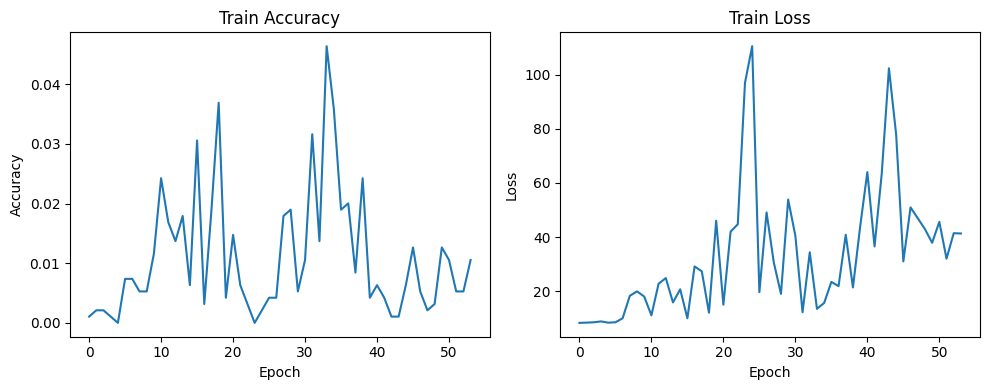

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(history.history['val_acc'])
ax[0].set_title('Train Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')

ax[1].plot(history.history['val_loss'])
ax[1].set_title('Train Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')

fig.tight_layout()
plt.show()

In [ ]:
model.save_weights('./checkpoints/0915_acc_0161')

저장한 모델 로드

In [ ]:
NUM_CLASSES = 4106 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 20,
    'steps': 100, #steps for epoch
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

config = Box(config)

#input선언 및 초기화
input_paper_id = keras.layers.Input(shape = (None,))
input_source = keras.layers.Input(shape = (None,))
input_year = keras.layers.Input(shape = (None,))
input_citation = keras.layers.Input(shape = (None,))
input_keywords = keras.layers.Input(shape = (None,))
input_feature = keras.layers.Input(shape = (None,))
input_topic = keras.layers.Input(shape = (None,))
input_popularity = keras.layers.Input(shape = (None,))
input_mat_t = keras.layers.Input(shape = (None,))
input_mat_b = keras.layers.Input(shape = (None,))
input_mature = keras.layers.Input(shape = (None,))


#초기화 해서 input list에 넣어줌
inputs = [input_paper_id, input_source, input_year, input_citation, input_keywords, input_feature, input_topic, input_popularity, input_mat_t, input_mat_b, input_mature]

model = CandidateGeneration(inputs, config.embedding_dims)

"""
model.compile(optimizer = tfa.optimizers.RectifiedAdam(learning_rate = config.lr),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
"""
model.compile(optimizer = keras.optimizers.Adam(learning_rate = config.lr),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])


model.load_weights('./checkpoints/230915_1044.ckpt')

loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)


33/33 [==============================] - 19s 5ms/step - loss: 11.5240 - acc: 0.1044
 Loss: 11.524012565612793 
 Accuracy: 0.10436432808637619


#100개 추출 코드

In [ ]:
y_predict = model.predict([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)])

33/33 [==============================] - 0s 2ms/step


In [ ]:
test_data = test_data.reset_index(drop = True)
test_data['data_no'] = test_data.index
test_data.head(3)

,author_id,paper_id,source,year,citation,keywords,feature,topic,mature,popularity,mat_t,mat_b,labels,labels_n,data_no
0,57204760699,"[9732, 10542, 12759]","[9, 6, 11, 11]","[2019, 2020, 2021]","[0.012908124525436599, 0.004555808656036447, 0...","[9324, 4106, 2885, 8144, 3343, 2671, 2380, 690...","[2875, 6903, 3370, 1997, 2671, 6328, 5939, 181...","[19, 28, 28, 19]","[0.7144864864864864, 0.7072432432432432, 0.576...","[0.8128834355828221, 0.46625766871165647, 0.46...","[0.8460455952716014, 0.7234731213059385, 0.723...","[0.15395440472839855, 0.2765268786940614, 0.27...",14475,3148,0
1,7006816402,[],[0],[],[],"[5366, 16627, 6032, 3330, 6032, 2799, 2006, 19...",[],[3],[0.7664864864864863],[],[],[],13675,2348,1
2,57194636927,[],[13],[],[],"[8144, 4896, 7353, 7285, 4895, 8663, 27064, 24...",[],[18],[0.9891891891891892],[],[],[],15253,3926,2


In [ ]:
print(len(y_predict[0])) #4107 -> 0~4106논문까지의 확률
y_predict[0]

4106


array([3.1201553e-14, 7.7151350e-12, 6.0834866e-12, ..., 9.8950474e-15,
       1.3077628e-12, 7.7404351e-14], dtype=float32)

In [ ]:
from tqdm import tqdm

pred_df = pd.DataFrame()
for i in tqdm(range(len(test_data))):
  df = pd.DataFrame({'can_doc': range(len(y_predict[i])), 'pred_value': y_predict[i]})
  df['paper_id'] = df['can_doc'] + 11327
  df = df.sort_values(by='pred_value', ascending=False)
  df['pred_value'] = df['pred_value'].apply(lambda x: round(x, 10))
  df['rank'] = range(1, len(df) + 1)
  df['data_no'] = i
  #print(predictions_df[predictions_df['Index'] == 3148])
  pred_df = pd.concat([pred_df, df], axis = 0)

print(len(pred_df))
pred_df

100%|██████████| 1054/1054 [00:39<00:00, 26.89it/s]

4327724


,can_doc,pred_value,paper_id,rank,data_no
2818,2818,0.967900,14145,1,0
3148,3148,0.031358,14475,2,0
520,520,0.000185,11847,3,0
3158,3158,0.000107,14485,4,0
909,909,0.000092,12236,5,0
...,...,...,...,...,...
2010,2010,0.000000,13337,4102,1053
1931,1931,0.000000,13258,4103,1053
3602,3602,0.000000,14929,4104,1053
3508,3508,0.000000,14835,4105,1053


In [ ]:
scaler = StandardScaler()
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

base_df_n = base_df_n.drop_duplicates(subset='paper_id')

#pred_df['user_key'] = pred_df['data_no'].map(test_data.set_index('data_no')['keywords'])
pred_df['can_doc_key'] = pred_df['paper_id'].map(base_df_n.set_index('paper_id')['keywords_'])
pred_df['can_topic'] = pred_df['paper_id'].map(base_df_n.set_index('paper_id')['topic'])


pred_df['labels_n'] = pred_df['data_no'].map(test_data.set_index('data_no')['labels_n'])
pred_df['mature'] = pred_df['data_no'].map(test_data.set_index('data_no')['mature'])
pred_df['mat_t'] = pred_df['paper_id'].map(base_df_n.set_index('paper_id')['mat_t'])
pred_df['popularity'] = pred_df['paper_id'].map(base_df_n.set_index('paper_id')['popularity'])

pred_df['mature_m'] = [np.mean(lst) for lst in pred_df['mature']]

pred_df['mat_gap'] = [euclidean_distance(row['mat_t'], row['mature_m']) for _, row in pred_df.iterrows()]
pred_df['mat_gap'] = (1/ scaler.fit_transform(pred_df[['mat_gap']]).values.reshape(-1, 1))

pred_df = pred_df.reset_index(drop = True)
pred_df.head(2)

,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap
0,2818,0.967900,14145,1,0,"14405,26005,28986,3117,6786,2202,2125,2051,106...",28,3148,"[0.7144864864864864, 0.7072432432432432, 0.576...",0.723473,0.466258,0.741892,50.125476
1,3148,0.031358,14475,2,0,"12157,2671,2380,3090,3601,7551,2974,2241,3813,...",19,3148,"[0.7144864864864864, 0.7072432432432432, 0.576...",0.846046,0.812883,0.741892,8.858133


In [ ]:
pred_df['mat_gap'] = [euclidean_distance(row['mat_t'], row['mature_m']) for _, row in pred_df.iterrows()]
pred_df.head(3)

,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap,final_score_pop,final_score_mat
3469570,536,0.991745,11863,1,845,"2553,2817,28155,17310,2078,4896,3813,2504,5997...",25,1090,"[0.6662702702702701, 0.9368648648648648, 0.671...",0.913313,1.0,0.727568,0.185745,99.174482,98.521700
2496448,3876,0.976751,15203,1,608,"2449,3325,8144,8144,2572,17062,10288,3334,3012...",25,85,"[0.8301621621621621, 0.8301621621621621, 0.697...",0.913313,1.0,0.770081,0.143232,97.675145,96.795446
3494206,2435,0.974358,13762,1,851,"14910,15148,9525,9164,3105,11157,2791,3105,814...",25,1802,[0.939135135135135],0.913313,1.0,0.939135,0.025822,97.435760,92.093794


In [ ]:
# 'mat_gap' 열의 최대값 구하기
max_value = pred_df['mat_gap'].max()

# 'mat_gap' 열의 최소값 구하기
min_value = pred_df['mat_gap'].min()

print("최대값:", max_value)
print("최소값:", min_value)

최대값: 0.9224849955500111
최소값: 1.5565241571424693e-05


In [ ]:
pred_df.loc[pred_df['mat_gap'] < 0.01, 'mat_gap'] = 0.01

# 'mat_gap' 열의 최대값 구하기
max_value = pred_df['mat_gap'].max()

# 'mat_gap' 열의 최소값 구하기
min_value = pred_df['mat_gap'].min()

print("최대값:", max_value)
print("최소값:", min_value)

최대값: 0.9224849955500111
최소값: 0.01


In [ ]:
pred_df['mat_gap_s'] = 1 / pred_df['mat_gap']

# 'mat_gap' 열의 최대값 구하기
max_value = pred_df['mat_gap_s'].max()

# 'mat_gap' 열의 최소값 구하기
min_value = pred_df['mat_gap_s'].min()

print("최대값:", max_value)
print("최소값:", min_value)

최대값: 100.0
최소값: 1.0840284718167934


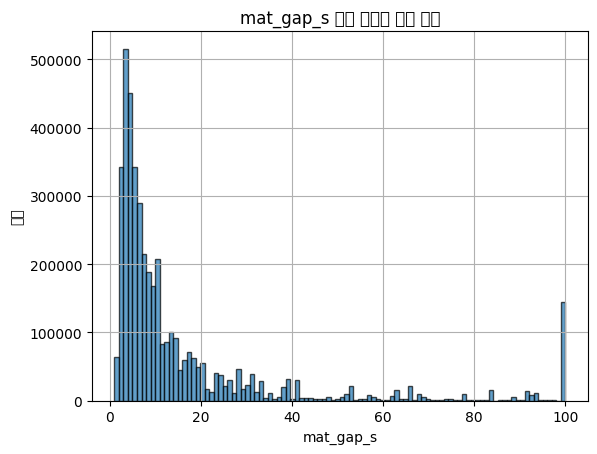

In [ ]:
plt.hist(pred_df['mat_gap_s'], bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('mat_gap_s')
plt.ylabel('빈도')
plt.title('mat_gap_s 열의 데이터 빈도 분포')
plt.grid(True)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0.01, 1))
pred_df['mat_gap_s'] = scaler.fit_transform(pred_df[['mat_gap_s']])

# 'mat_gap' 열의 최대값 구하기
max_value = pred_df['mat_gap_s'].max()

# 'mat_gap' 열의 최소값 구하기
min_value = pred_df['mat_gap_s'].min()

print("최대값:", max_value)
print("최소값:", min_value)

# 'mat_gap' 열에서 'inf' 값을 1으로 대체

최대값: 1.0
최소값: 0.01


In [ ]:
print(pred_df.shape)
pred_df.head(3)

(4327724, 16)


,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap,final_score_pop,final_score_mat,mat_gap_s
3469570,536,0.991745,11863,1,845,"2553,2817,28155,17310,2078,4896,3813,2504,5997...",25,1090,"[0.6662702702702701, 0.9368648648648648, 0.671...",0.913313,1.0,0.727568,0.185745,99.174482,5.339278,0.053033
2496448,3876,0.976751,15203,1,608,"2449,3325,8144,8144,2572,17062,10288,3334,3012...",25,85,"[0.8301621621621621, 0.8301621621621621, 0.697...",0.913313,1.0,0.770081,0.143232,97.675145,6.819385,0.069027
3494206,2435,0.974358,13762,1,851,"14910,15148,9525,9164,3105,11157,2791,3105,814...",25,1802,[0.939135135135135],0.913313,1.0,0.939135,0.025822,97.435760,37.732977,0.386740


논문추천

In [ ]:
#추천1: pred_value기반
#추천2: pred_value * popularity
pred_df["final_score_pop"] = (pred_df["pred_value"] * pred_df["popularity"]) * 100
pred_df = pred_df.sort_values(by='final_score_pop', ascending=False)

In [ ]:
#추천3: pred_value * mat_gap(저자의 과거 mat성향과 추천된 논문의 mat상태차이)고려
pred_df["final_score_mat"] = (pred_df["pred_value"] * pred_df["mat_gap_s"]) *100
pred_df.head(3)

,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap,final_score_pop,final_score_mat,mat_gap_s
3469570,536,0.991745,11863,1,845,"2553,2817,28155,17310,2078,4896,3813,2504,5997...",25,1090,"[0.6662702702702701, 0.9368648648648648, 0.671...",0.913313,1.0,0.727568,0.185745,99.174482,5.259565,0.053033
2496448,3876,0.976751,15203,1,608,"2449,3325,8144,8144,2572,17062,10288,3334,3012...",25,85,"[0.8301621621621621, 0.8301621621621621, 0.697...",0.913313,1.0,0.770081,0.143232,97.675145,6.742203,0.069027
3494206,2435,0.974358,13762,1,851,"14910,15148,9525,9164,3105,11157,2791,3105,814...",25,1802,[0.939135135135135],0.913313,1.0,0.939135,0.025822,97.435760,37.682260,0.386740


In [ ]:
# rank 열이 1001 이상인 행 삭제
pred_df_1000 = pred_df[pred_df['rank'] < 1001]

pred_df_1000 = pred_df_1000.sort_values(by='rank')
print(pred_df_1000.shape)
pred_df_1000.tail(3)

(1054000, 16)


,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap,final_score_pop,final_score_mat,mat_gap_s
3330965,1291,3.551000e-07,12618,1000,811,"4785,2689,10210,13340,3508,5543,1997,10210,133...",11,2128,"[0.5998918918918918, 0.814054054054054, 0.8783...",0.740079,0.432515,0.764108,0.024029,0.000015,1.476018e-05,0.415663
4213755,1965,3.918000e-07,13292,1000,1026,"28283,22311,7666,12353,20014,13910,18514,4012,...",29,1341,[0.6544864864864864],0.862370,0.562372,0.654486,0.207883,0.000022,1.853029e-06,0.047295
3425403,3176,9.440000e-08,14503,1000,834,"13003,2276,5157,19939,2075,19241,2944,9732,973...",21,2875,"[0.7114594594594594, 0.8707027027027026, 0.670...",0.630312,0.476483,0.858471,0.228159,0.000004,4.060795e-07,0.043017


In [ ]:
# rank 열이 1001 이상인 행 삭제
pred_df_980 = pred_df[pred_df['rank'] < 981]

pred_df_980 = pred_df_980.sort_values(by='rank')
print(pred_df_980.shape)
pred_df_980.tail(3)

(1032920, 16)


,can_doc,pred_value,paper_id,rank,data_no,can_doc_key,can_topic,labels_n,mature,mat_t,popularity,mature_m,mat_gap,final_score_pop,final_score_mat,mat_gap_s
2965511,1270,4.330000e-08,12597,980,722,"4550,10660,8144,1021,3032,16635,3806,8583,1043...",22,862,[0.5457297297297297],0.669716,0.583845,0.545730,0.123986,2.528047e-06,3.458513e-07,0.079873
1429867,1106,8.000000e-10,12433,980,348,"4180,4106,3185,4401,4800,20414,2884,4106,2658,...",24,3540,[0.6416216216216216],0.802139,0.519427,0.641622,0.160517,4.155419e-08,4.920157e-09,0.061502
2316763,2571,1.000000e-10,13898,980,564,"18462,8833,4183,4619,2495,2591,10039,2118,3813...",19,1252,[0.5566486486486486],0.846046,0.812883,0.556649,0.289397,8.128834e-09,3.373448e-10,0.033734


In [ ]:
pred_df_980.to_csv("pred_df_230920_980.csv")

#ETC_experiments results

In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'steps': 100, #steps for epoch
    'top_k':10,
    'lr' : 0.001,
    'embedding_dims' : 128,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 50.4554 - acc: 0.0057
 Loss: 50.45539855957031 
 Accuracy: 0.005692599806934595


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'steps': 100, #steps for epoch
    'top_k':10,
    'lr' : 0.001,
    'embedding_dims' : 300,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 5ms/step - loss: 37.8823 - acc: 0.0161
 Loss: 37.88230895996094 
 Accuracy: 0.016129031777381897


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'steps': 100, #steps for epoch
    'top_k':10,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 64.6833 - acc: 0.0095
 Loss: 64.68325805664062 
 Accuracy: 0.009487666189670563


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'steps': 200, #steps for epoch
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 90.2463 - acc: 0.0047
 Loss: 90.24625396728516 
 Accuracy: 0.004743833094835281


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 8,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 87.6510 - acc: 0.0038
 Loss: 87.6509780883789 
 Accuracy: 0.0037950663827359676


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 128,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 25.8253 - acc: 0.0171
 Loss: 25.82527732849121 
 Accuracy: 0.017077798023819923


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords, avg_feature]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 128,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 5ms/step - loss: 38.1119 - acc: 0.0104
 Loss: 38.11193084716797 
 Accuracy: 0.01043643243610859


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords, avg_feature]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 5ms/step - loss: 74.3942 - acc: 0.0076
 Loss: 74.39419555664062 
 Accuracy: 0.007590132765471935


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords, avg_citation]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 66.2668 - acc: 0.0028
 Loss: 66.26678466796875 
 Accuracy: 0.0028462999034672976


In [ ]:
"""
[avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 38.2964 - acc: 0.0171
 Loss: 38.296382904052734 
 Accuracy: 0.017077798023819923


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 16,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 22.0834 - acc: 0.0389
 Loss: 22.083431243896484 
 Accuracy: 0.03889942914247513


In [ ]:
"""
[avg_papers, avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 2s 4ms/step - loss: 53.4961 - acc: 0.0313
 Loss: 53.496124267578125 
 Accuracy: 0.03130929917097092


In [ ]:
"""
[avg_source, avg_year, avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 40.1088 - acc: 0.0152
 Loss: 40.1087760925293 
 Accuracy: 0.01518026553094387


In [ ]:
"""
[avg_source, avg_year, avg_feature]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}

"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 37.9408 - acc: 9.4877e-04
 Loss: 37.94075012207031 
 Accuracy: 0.0009487665956839919


In [ ]:
"""
[avg_source, avg_year, avg_feature]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [512, 256, 128]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 64.5145 - acc: 0.0028
 Loss: 64.51451110839844 
 Accuracy: 0.0028462999034672976


In [ ]:
"""
([avg_source, avg_year, avg_feature])
config = {
    'epochs': 100,
    'top_k':10,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}

"""

# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float)],
                                 test_data['labels'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

input_paper_id: Tensor("IteratorGetNext:0", shape=(None, 41), dtype=int32)
embedding_out: Tensor("candidate_generation_13/embedding_13/embedding_lookup/Identity:0", shape=(None, 41, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_13/masked_embeddings_aggregator_layer_13/PartitionedCall:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_13/embedding_13/embedding_lookup_1/Identity:0", shape=(None, 41, 16), dtype=float32)
avg_features: Tensor("candidate_generation_13/masked_embeddings_aggregator_layer_13/PartitionedCall_1:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_13/embedding_13/embedding_lookup_2/Identity:0", shape=(None, 41, 16), dtype=float32)
avg_features: Tensor("candidate_generation_13/masked_embeddings_aggregator_layer_13/PartitionedCall_2:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_13/embedding_13/emb

In [ ]:
"""
([avg_source, avg_year, avg_keywords, avg_feature, avg_mature]
config = {
    'epochs': 100,
    'top_k':10,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [512, 256, 128]
}


"""

# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

input_paper_id: Tensor("IteratorGetNext:0", shape=(None, 30), dtype=int32)
embedding_out: Tensor("candidate_generation_25/embedding_24/embedding_lookup/Identity:0", shape=(None, 30, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_25/masked_embeddings_aggregator_layer_24/PartitionedCall:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_25/embedding_24/embedding_lookup_1/Identity:0", shape=(None, 31, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_25/masked_embeddings_aggregator_layer_24/PartitionedCall_1:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_25/embedding_24/embedding_lookup_2/Identity:0", shape=(None, 30, 16), dtype=float32)
avg_features: Tensor("candidate_generation_25/masked_embeddings_aggregator_layer_24/PartitionedCall_2:0", shape=(None, 16), dtype=float32)
e

In [ ]:
"""
[avg_papers,avg_source,avg_year,avg_keywords,avg_feature]
config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

input_paper_id: Tensor("IteratorGetNext:0", shape=(None, 30), dtype=int32)
embedding_out: Tensor("candidate_generation_2/embedding_2/embedding_lookup/Identity:0", shape=(None, 30, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_2/masked_embeddings_aggregator_layer_2/PartitionedCall:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_2/embedding_2/embedding_lookup_1/Identity:0", shape=(None, 31, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_2/masked_embeddings_aggregator_layer_2/PartitionedCall_1:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_2/embedding_2/embedding_lookup_2/Identity:0", shape=(None, 30, 16), dtype=float32)
avg_features: Tensor("candidate_generation_2/masked_embeddings_aggregator_layer_2/PartitionedCall_2:0", shape=(None, 16), dtype=float32)
embedding_out

In [ ]:
"""
[avg_papers,avg_source,avg_year,avg_keywords,avg_topic]
config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

input_paper_id: Tensor("IteratorGetNext:0", shape=(None, 30), dtype=int32)
embedding_out: Tensor("candidate_generation_3/embedding_3/embedding_lookup/Identity:0", shape=(None, 30, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_3/masked_embeddings_aggregator_layer_3/PartitionedCall:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_3/embedding_3/embedding_lookup_1/Identity:0", shape=(None, 31, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_3/masked_embeddings_aggregator_layer_3/PartitionedCall_1:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_3/embedding_3/embedding_lookup_2/Identity:0", shape=(None, 30, 16), dtype=float32)
avg_features: Tensor("candidate_generation_3/masked_embeddings_aggregator_layer_3/PartitionedCall_2:0", shape=(None, 16), dtype=float32)
embedding_out

In [ ]:
"""
[avg_papers, avg_year, avg_source, avg_citation, avg_keywords]
config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

input_paper_id: Tensor("IteratorGetNext:0", shape=(None, 30), dtype=int32)
embedding_out: Tensor("candidate_generation_8/embedding_8/embedding_lookup/Identity:0", shape=(None, 30, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_8/masked_embeddings_aggregator_layer_8/PartitionedCall:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_8/embedding_8/embedding_lookup_1/Identity:0", shape=(None, 31, 16), dtype=float32)
aggregated: Tensor("Mean:0", shape=(None, 16), dtype=float32)
avg_features: Tensor("candidate_generation_8/masked_embeddings_aggregator_layer_8/PartitionedCall_1:0", shape=(None, 16), dtype=float32)
embedding_out: Tensor("candidate_generation_8/embedding_8/embedding_lookup_2/Identity:0", shape=(None, 30, 16), dtype=float32)
avg_features: Tensor("candidate_generation_8/masked_embeddings_aggregator_layer_8/PartitionedCall_2:0", shape=(None, 16), dtype=float32)
embedding_out

In [ ]:
"""
[avg_papers, avg_year, avg_source, avg_citation, avg_keywords]
config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [1024, 512, 256]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

66/66 [==============================] - 1s 4ms/step - loss: 54.3382 - acc: 0.0228
 Loss: 54.338226318359375 
 Accuracy: 0.02277039922773838


In [ ]:
"""
([avg_source, avg_keywords])
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [512, 256, 126] #, 128] #[256, 128, 64]  # #[256, 128] # #[1024,
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 62.0112 - acc: 0.0047
 Loss: 62.01123809814453 
 Accuracy: 0.004743833094835281


In [ ]:
"""
[avg_papers, avg_year, avg_source,avg_keywords]
NUM_CLASSES = 4107 #len(train_data['paper_id'].unique()) + 2   #base_df['paper_id'].max()+2
NUM_CLASSES

config = {
    'epochs': 100,
    'top_k':20,
    'lr' : 0.001,
    'embedding_dims' : 16,
    'dense_units' : 64,
    'layers': [512, 256, 128]
}
"""
# 모델 평가
loss, accuracy = model.evaluate([sequence.pad_sequences(test_data['paper_id']),
                                 sequence.pad_sequences(test_data['source'],),
                                 sequence.pad_sequences(test_data['year']),
                                 sequence.pad_sequences(test_data['citation']),
                                 sequence.pad_sequences(test_data['keywords']),
                                 sequence.pad_sequences(test_data['feature']),
                                 sequence.pad_sequences(test_data['topic']),
                                 sequence.pad_sequences(test_data['popularity'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_t'], dtype = float),
                                 sequence.pad_sequences(test_data['mat_b'], dtype = float),
                                 sequence.pad_sequences(test_data['mature'], dtype = float)],
                                 test_data['labels_n'].values, )


print(" Loss:",loss,"\n","Accuracy:", accuracy)

33/33 [==============================] - 1s 4ms/step - loss: 54.2598 - acc: 0.0114
 Loss: 54.259849548339844 
 Accuracy: 0.01138519961386919


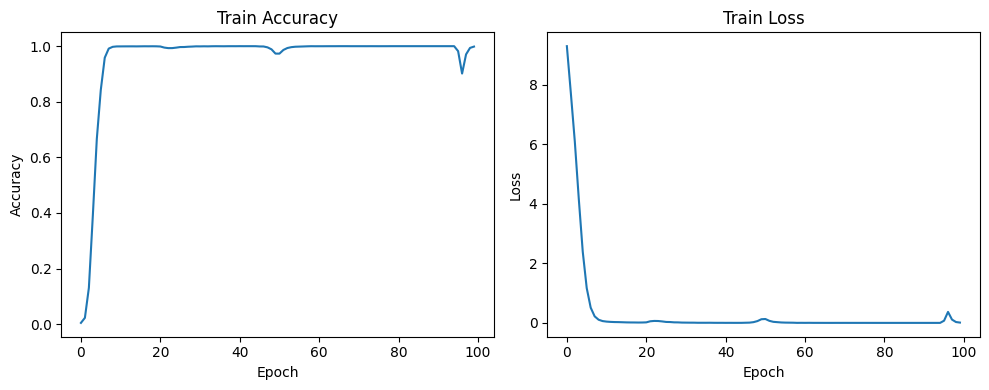

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(history.history['acc'])
ax[0].set_title('Train Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')

ax[1].plot(history.history['loss'])
ax[1].set_title('Train Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')

fig.tight_layout()
plt.show()